Kiet Nguyen

ID: 001601720

Email: kngu179@wgu.edu

### A. Purpose of Analysis

#### A1. Relevant Question

Can we reduce the dimensionality of our dataset while keeping the most important variables?

Our dataset was high dimensional since we had 50 columns. Most of these columns did not explain the variability of the data. We wanted to reduce the columns with little to no variance. A smaller number of dimensions made the data less complex to analyze and a lower chance of model overfitting (Boeye, 2022).

#### A2. Analysis Goal

The main goal of this analysis was to reduce the dataset to only the important variables that explained most of the variability in the data. 

### B. Technique Justification

#### B1. Explanation of PCA

Principal Component Analysis (PCA) worked by calculating the covariance matrix of the dimensions in a dataset. For example, if the dataset had 2 dimensions `x` and `y`, then the covariance matrix would be:

$$ 
Matrix(Covariance) = 
\begin{bmatrix}
Cov(x, x) && Cov(x, y)\\
Cov(y, x) && Cov(y, y)
\end{bmatrix}
$$

This matrix represents the correlations between the dimensions. The PCA algorithm computed the eigenvectors, the directions of the axes with the most variance, and eigenvalues, the coefficients of those directions. The pricipal components were the directions of the data that contained the most information. By ranking these principal components, we could identify which components explained the most variance about our dataset (Jaadi, 2022).

#### B2. PCA Assumption

PCA assumes that all variables have a linear relationship. It uses this assumption of correlations to calculate the eigenvectors and eigenvalues.

### C. Data Preparation

#### C1. Initial Dataset

The intial dataset contained 19 continuous variables: `Population`, `Children`, `Age`, `Income`, `Outage_sec_perweek`, `Email`, `Contacts`, `Yearly_equip_failure`, `Tenure`, `MonthlyCharge`, `Bandwidth_GB_Year`, and `Item1` through `Item8` of the survey responses.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import dataset
churn = pd.read_csv('churn_clean.csv')

In [3]:
# Create new dataframe with relevant continuous variables
df = churn[['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
            'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
            'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']].copy()

In [4]:
# Rename survey responses columns
df.rename(columns={
    'Item1': 'SurveyResponse',
    'Item2': 'SurveyFixes',
    'Item3': 'SurveyReplacements',
    'Item4': 'SurveyReliability',
    'Item5': 'SurveyOptions',
    'Item6': 'SurveyRespect',
    'Item7': 'SurveyCourteous',
    'Item8': 'SurveyListening'
}, inplace=True)

#### C2. Standardize Variables

In [5]:
# Create scaler object
scaler = StandardScaler()

# Standardize data and assign values back to dataframe
df.loc[:, :] = scaler.fit_transform(df)

df.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,SurveyResponse,SurveyFixes,SurveyReplacements,SurveyReliability,SurveyOptions,SurveyRespect,SurveyCourteous,SurveyListening
0,-0.673405,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487,1.454307,1.444922,1.471896,-0.485004,0.494844,0.486389,-0.495406,0.490384
1,0.047772,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876,-0.472948,0.478354,-0.473770,-0.485004,0.494844,-0.481165,0.476931,0.490384
2,-0.417238,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138,0.490679,0.478354,-1.446603,0.489878,0.494844,-0.481165,-0.495406,-0.481828
3,0.284537,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857,0.490679,0.478354,0.499063,-1.459886,1.470674,0.486389,-0.495406,-0.481828
4,0.110549,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184,0.490679,0.478354,0.499063,-0.485004,0.494844,0.486389,0.476931,1.462596


In [6]:
# Export copy of standardized dataset
df.to_csv('churn_standardized.csv', index=False)

### D. Perform PCA

#### D1. Components Matrix

In [7]:
# Adapted from Dimensionality Reduction in Python (Boeye, 2022)
# https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python

# Create PCA object and apply to dataset
pca = PCA(n_components=df.shape[1])
pca.fit_transform(df)

# PCA matrix
pca_cols = [f'PC {i + 1}' for i in range(pca.n_components_)]
matrix = pd.DataFrame(
    pca.components_.T,
    columns=pca_cols,
    index=df.columns)
matrix

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19
Population,-0.002109,-0.005463,0.014732,-0.292151,0.264958,0.402355,0.355864,0.329128,0.161654,0.580378,0.167295,0.229022,-0.057130,0.019142,-0.016176,0.001210,-0.005661,-0.002356,-0.000322
Children,0.004072,0.015862,0.028393,0.510569,0.345310,-0.089376,0.119069,0.226847,0.155912,-0.175953,0.655599,-0.241974,0.017020,-0.012250,-0.014011,0.014490,0.020915,-0.000948,-0.021615
Age,0.006459,0.000294,-0.029319,-0.455297,-0.417933,0.183902,0.152752,-0.024113,0.346066,-0.180481,0.234748,-0.590829,-0.045336,0.002513,-0.002495,-0.009405,0.005784,0.013696,0.022421
Income,0.001038,0.006035,0.025865,0.252065,-0.285030,-0.084983,-0.429611,0.581477,0.449649,0.219833,-0.252659,-0.057674,-0.020484,-0.079018,-0.007573,-0.002561,0.005301,0.013466,-0.000910
Outage_sec_perweek,-0.017516,0.003927,-0.014363,-0.220115,0.339482,-0.591284,0.273527,0.262607,-0.149557,0.125521,-0.319263,-0.439536,-0.089844,0.016926,-0.008716,0.013529,0.018262,0.013516,0.000361
Email,0.008744,-0.020609,-0.003459,-0.190450,0.519450,0.319498,-0.103117,0.170129,0.290785,-0.592268,-0.328652,0.061145,0.061158,-0.017175,-0.016342,0.006449,-0.017253,0.000961,0.000226
Contacts,-0.008761,0.003318,-0.011853,-0.420731,-0.124577,-0.146366,-0.275202,0.508824,-0.434373,-0.248703,0.371468,0.241548,0.044032,-0.035285,-0.003279,-0.026498,0.020255,-0.000813,-0.000948
Yearly_equip_failure,-0.007688,0.017604,0.008199,0.167516,-0.373155,-0.147092,0.686465,0.241921,0.114547,-0.334113,-0.146136,0.365394,0.020739,0.006446,-0.015853,-0.001308,0.007488,-0.021448,-0.000145
Tenure,-0.016320,0.702323,-0.063085,-0.005355,-0.007568,0.048576,0.000016,0.007554,-0.028780,-0.001590,-0.028600,-0.027147,0.005940,-0.003507,0.006548,-0.007773,-0.004625,0.007519,-0.705251
MonthlyCharge,0.000930,0.039858,-0.009499,-0.298690,0.113921,-0.537631,-0.112559,-0.284655,0.562547,0.029519,0.228176,0.375187,-0.005920,0.014551,-0.016508,-0.000068,0.021494,-0.012007,-0.045778


#### D2. Number of Components

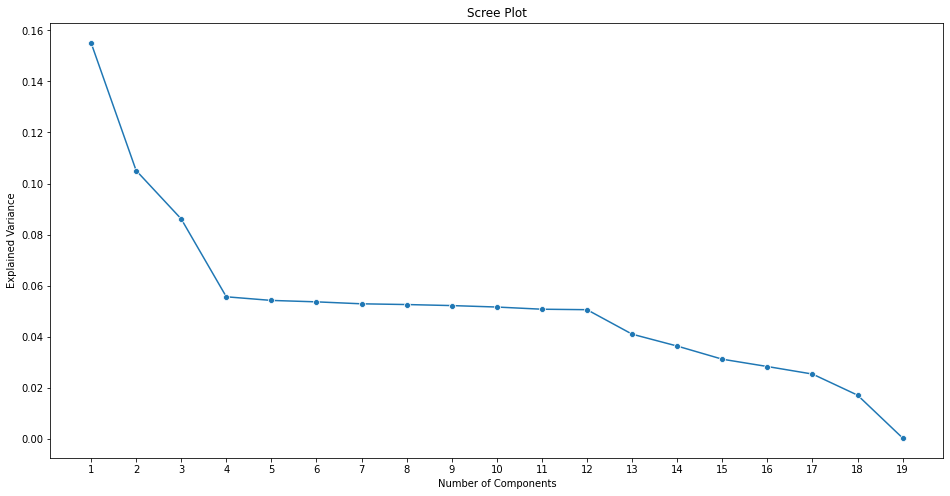

In [8]:
# Adapted from How to Perform PCA in Python (Middleton, 2021)
# https://my.wgu.edu/courses/course/23720006/course-material

# Create scree plot showing component variance
pca_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(16, 8))
sns.lineplot(x=pca_values, y=pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.xticks(range(1, 20))
plt.show()

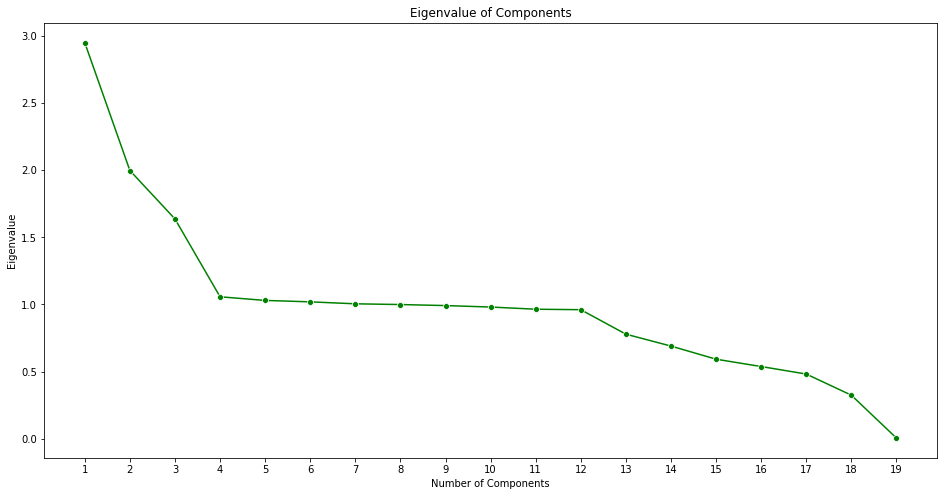

In [9]:
# Calculate the covariance and eigenvalues of each component
cov_values = np.dot(df.T, df) / df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_values, eigenvector)) for eigenvector in pca.components_]

# Plot eigenvalues for Kaiser criterion
plt.figure(figsize=(16, 8))
# plt.plot(pca_values, eigenvalues, 'o-', color='green')
sns.lineplot(x=pca_values, y=eigenvalues, marker='o', color='green')
plt.title('Eigenvalue of Components')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.xticks(range(1, 20))
plt.show()

Using the scree plot and the elbow rule, we identified the number of principal components to be four. However, the total explained variance appeared to be relatively low with only four components. Instead, we plotted the eigenvalue of each component and used the Kaiser criterion for additional insight. With this criteria, all components with eigenvalues greater than one were selected. This method gave us 12 principal components and provided more total explained variance.

#### D3. Variance of Components

In [10]:
print('Principal Components Explained Variance:')

# Percentage of variance explained by each component
for index, var in enumerate(pca.explained_variance_ratio_):
    print(f'- PC {index + 1}: {round(var * 100, 2)}%')
    # Break out of loop at 12 components
    if index == 11:
        break

Principal Components Explained Variance:
- PC 1: 15.52%
- PC 2: 10.51%
- PC 3: 8.61%
- PC 4: 5.56%
- PC 5: 5.42%
- PC 6: 5.36%
- PC 7: 5.29%
- PC 8: 5.26%
- PC 9: 5.22%
- PC 10: 5.16%
- PC 11: 5.08%
- PC 12: 5.06%


#### D4. Total Variance

In [11]:
# Sum of variance for 12 principal components
total = sum(pca.explained_variance_ratio_[:12])
print(f'Total Explained Variance: {round(total * 100, 2)}%')

Total Explained Variance: 82.05%


#### D5. Analysis Results

We used PCA to reduce the dimensions of our dataset and retained 12 principal components. These components explained 82.05% of the total variability. This meant that the other 38 variables only contributed 17.95% to the explained variance. By focusing our analyses on these important features, we could significantly reduce the resources required and avoid overfitting our models. An added value of this analysis was that we could also use all 19 components to explain the maximum variance possible. However, we would need to consider the trade-offs if we decided to pursue this option.

### E. Third-Party Code

Middleton, K. (2021). Lesson 7: Principal Component Analysis (PCA). Western Governors Uni-
versity. Retrieved July 11, 2022. https://my.wgu.edu/courses/course/23720006/course-material

### F. References

Boeye, J. (2022). Dimensionality Reduction in Python. DataCamp. Retrieved July 10, 2022, from https://app.datacamp.com/learn/courses/dimensionality-reduction-in-python

Jaadi, Z. (2022, July 14). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. Retrieved July 11, 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis